# FIFA 2020 Players Clustering using K Means - by Thiyaneshwaran Nagarajan

### Using clustering algorithms to cluster similar players using their traits and their different skills in the field.

In [1]:
#Importing necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan
import math

In [2]:
# Reading the data 
data = pd.read_csv('players_20.csv')
pd.set_option('max_columns', None)
print(data.shape)
data.head()

(18278, 104)


sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [3]:
#Checking for null values in "data" dataframe
null_values = data.isnull().sum()
print(null_values)
null_values.shape

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64


(104,)

In [4]:
#Checking for dupicated rows in "data" dataframe
data.duplicated().sum()

0

### The features "ls" to "rb" are not in proper format. So, manupulating those features using the below function. And save it a new csv file named "fifa2020new.csv"

print(data.st[2])
def data_column(column):
    x = np.arange(0,18278)
    for j in column:
        for i in x:
            if type(data[j][i]) == str:
                a= data[j][i][0:2]
                b = data[j][i][3:]
                data[j][i]=float(a)+float(b)
fifa_columns = data.columns[78:104]
data_column(fifa_columns)

### Reading the Newly Saved FIFA 20 CSV file

In [5]:
data = pd.read_csv('fifa20new.csv')
pd.set_option('max_columns', None)

In [6]:
data.head()

Unnamed: 0  sofifa_id                                         player_url  \
0           0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1           1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2           2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3           3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4           4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN

# Exploratory Data Analysis

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='preferred_foot', ylabel='count'>

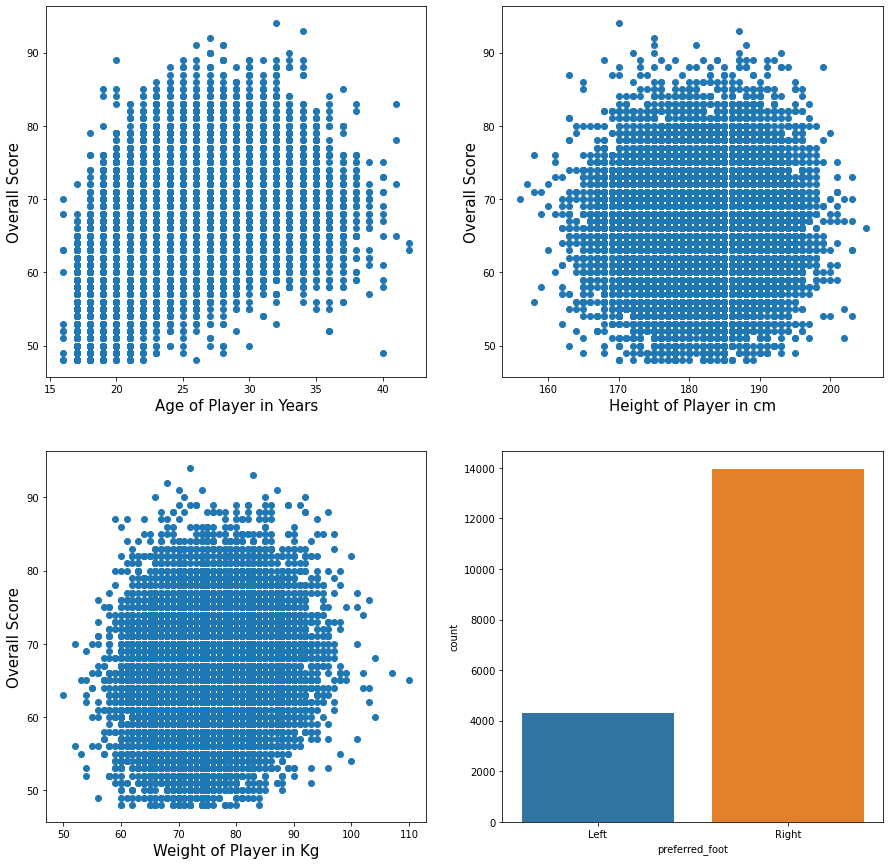

In [7]:
# Age vs Overall Score
from matplotlib.pyplot import figure
fig, ax = plt.subplots(2,2,figsize=(15, 15))
ax[0,0].scatter(data.age, data.overall)
ax[0,1].scatter(data.height_cm, data.overall)
ax[1,0].scatter(data.weight_kg, data.overall)
ax[0,0].set_xlabel("Age of Player in Years", fontsize=15)
ax[0,1].set_xlabel("Height of Player in cm",fontsize=15)
ax[1,0].set_xlabel("Weight of Player in Kg",fontsize=15)
ax[0,0].set_ylabel("Overall Score",fontsize=15)
ax[0,1].set_ylabel("Overall Score",fontsize=15)
ax[1,0].set_ylabel("Overall Score",fontsize=15)
sns.countplot(data.preferred_foot,ax=ax[1,1])


Text(0, 0.5, 'Nationality')

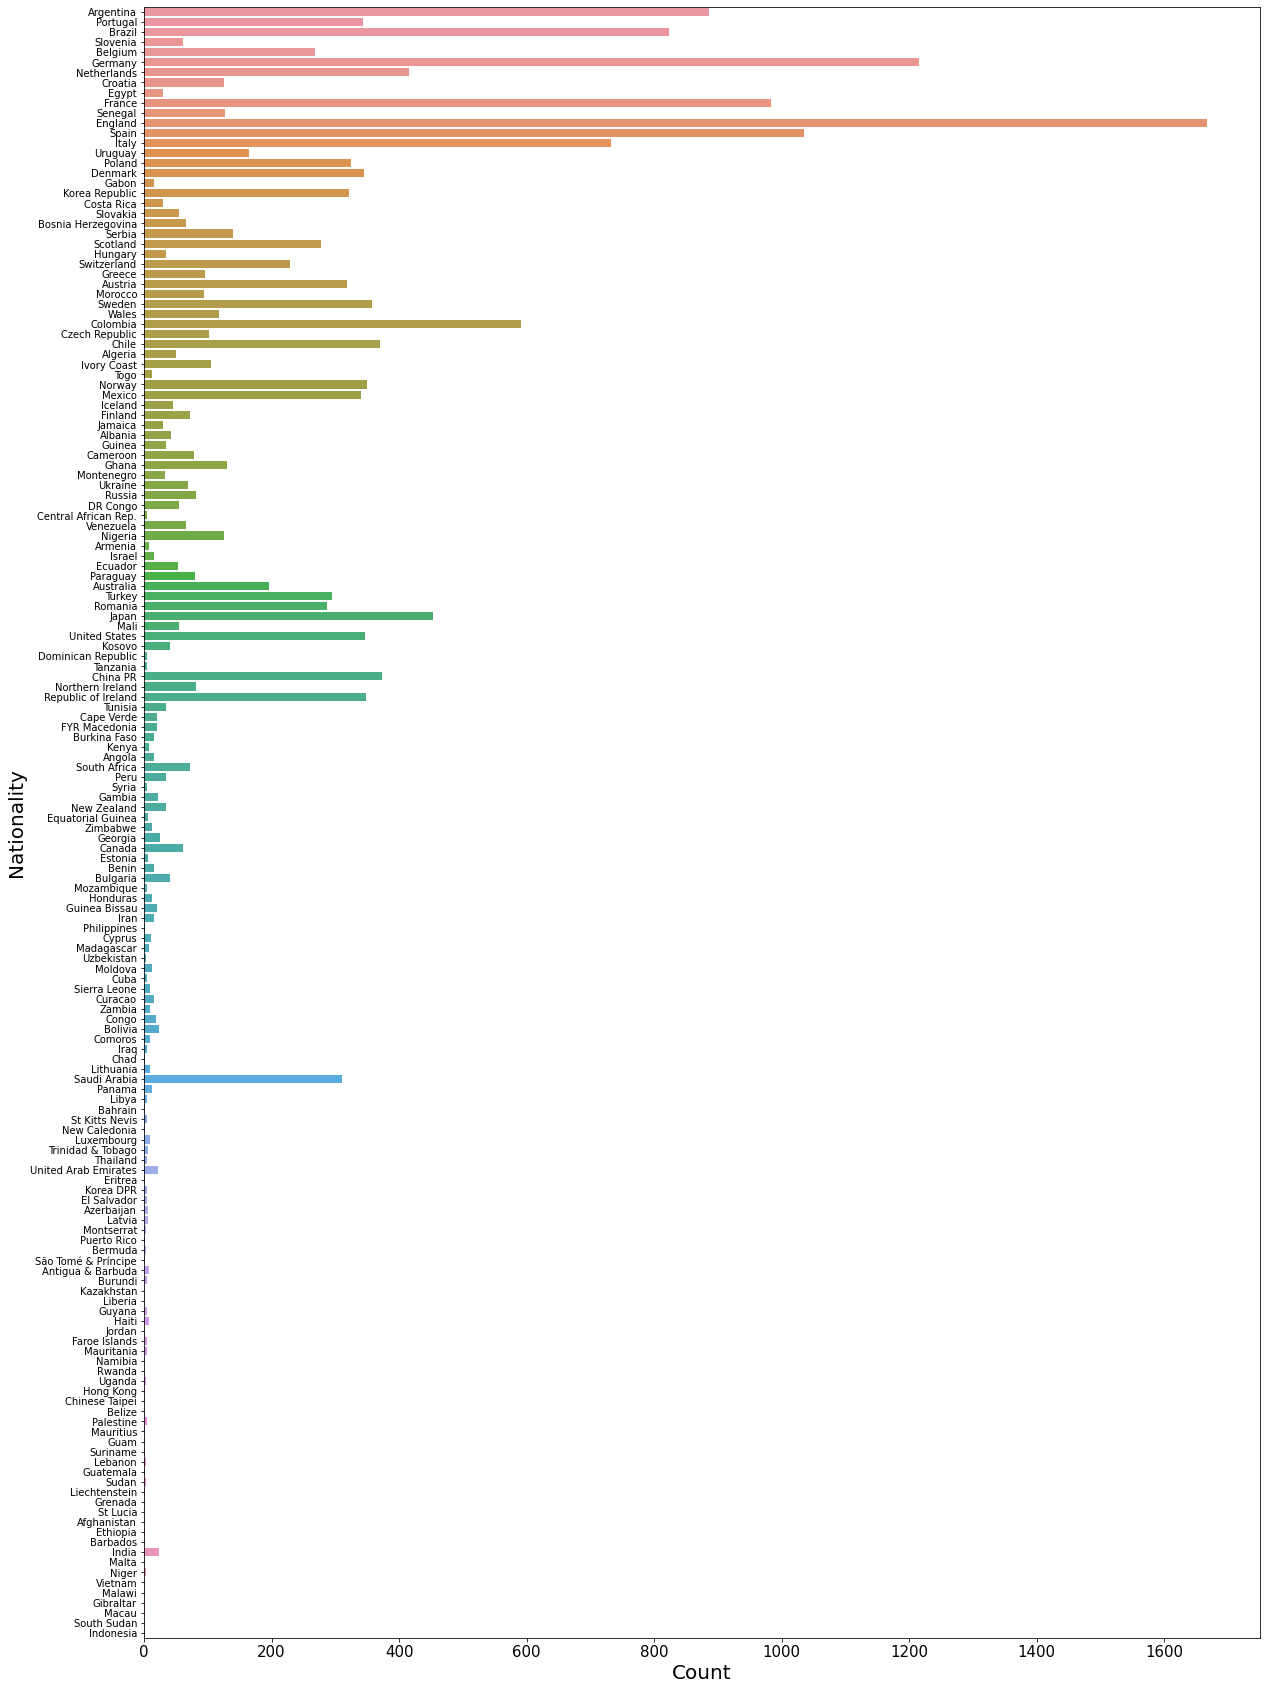

In [8]:
# Nationality Count Plot
fig, ax = plt.subplots(figsize=(20, 30))
sns.countplot(y='nationality',data=data,ax=ax)
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=10)
ax.set_xlabel('Count',fontsize=20)
ax.set_ylabel('Nationality',fontsize=20)

Text(0, 0.5, 'Players value in Euro')

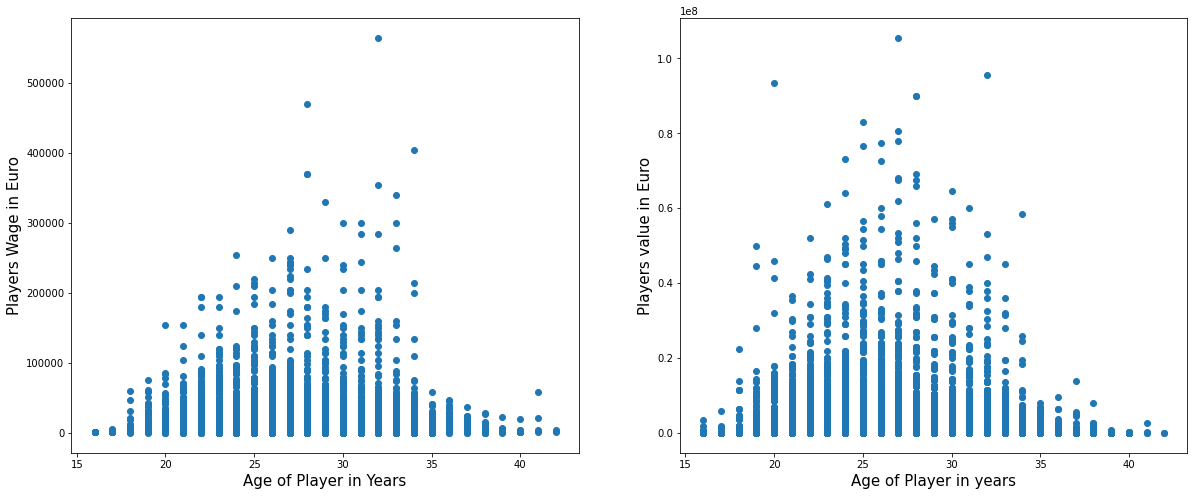

In [9]:
# player age vs wage
fig, ax = plt.subplots(1,2,figsize=(20, 8))
ax[0].scatter(data.age, data.wage_eur)
ax[1].scatter(data.age, data.value_eur)
ax[0].set_xlabel("Age of Player in Years", fontsize=15)
ax[1].set_xlabel("Age of Player in years",fontsize=15)
ax[0].set_ylabel("Players Wage in Euro",fontsize=15)
ax[1].set_ylabel("Players value in Euro",fontsize=15)

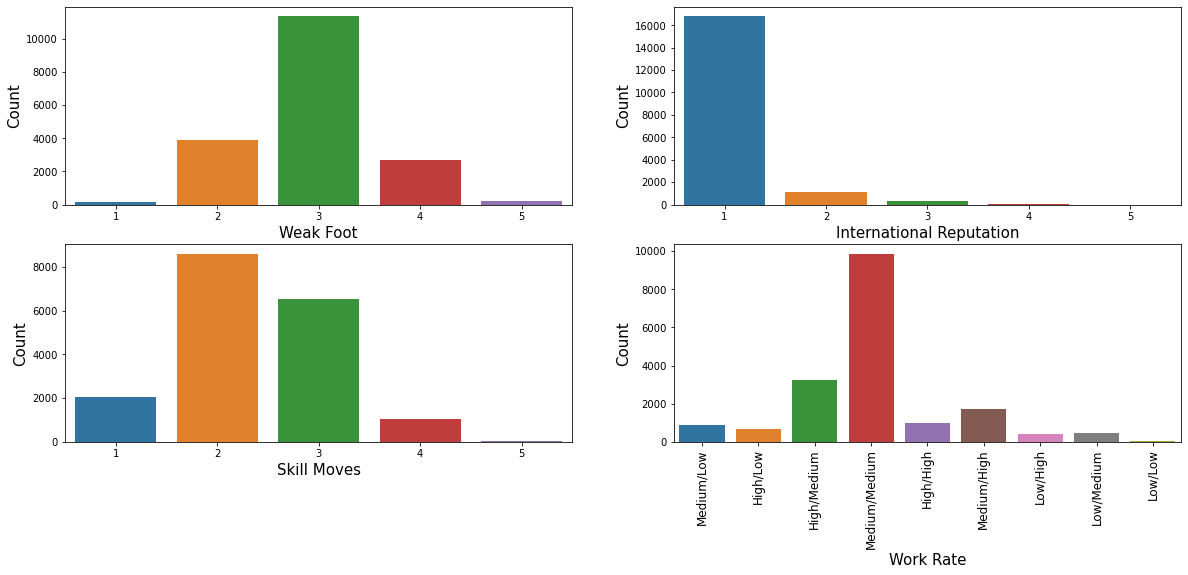

In [10]:
# Count Plot for weak foot, Internation Reputaion, Skill Moves and Work Rate
fig, ax = plt.subplots(2,2,figsize=(20, 8))
sns.countplot(x='weak_foot', data=data, ax=ax[0,0])
sns.countplot(x='international_reputation', data=data, ax=ax[0,1])
sns.countplot(x='skill_moves', data=data, ax=ax[1,0])
sns.countplot(x='work_rate', data=data, ax=ax[1,1])
ax[0,0].set_xlabel("Weak Foot", fontsize=15)
ax[0,1].set_xlabel("International Reputation",fontsize=15)
ax[1,0].set_xlabel("Skill Moves",fontsize=15)
ax[1,1].set_xlabel("Work Rate",fontsize=15)
ax[0,0].set_ylabel("Count",fontsize=15)
ax[0,1].set_ylabel("Count",fontsize=15)
ax[1,0].set_ylabel("Count",fontsize=15)
ax[1,1].set_ylabel("Count",fontsize=15)
ax[1,1].tick_params(axis='x', which='major', labelsize=12, rotation=90)

## Getting the unique team_postion of the players

In [11]:
data.team_position.unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

## Defining the General Class of the Players

In [12]:
attackers=['RW', 'LW','ST','CF','LS','RS','RF','LF']
midfielders=['LAM','CAM','RAM','LM','CM','RM','LCM','RCM','CDM', 'LDM','RDM']
defenders= ['RWB', 'LWB','RB','LB','CB','LCB','RCB']
goal_keepers=['GK']

## Split the string in "player_positions" and create new feature "positions"

In [13]:
#pd.set_option('display.max_rows', 110)
data["positions"] = data['player_positions'].str.split(', ')
data.head()

Unnamed: 0  sofifa_id                                         player_url  \
0           0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1           1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2           2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3           3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4           4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN

# Finding the Class of the Players

### Based on the keyword for the players_positions, general position name is given to each player

In [14]:

def seperate_class(j):
    players_class=[]
    for j in np.arange(0,18278):   
        if len(data.positions[j])<=2 and data.positions[j][0] in attackers:
            players_class.append('attacker')
        elif len(data.positions[j])<=2 and data.positions[j][0] in midfielders:
            players_class.append('midfielder')
        elif len(data.positions[j])<=2 and data.positions[j][0] in defenders:
            players_class.append('defender')   
        elif len(data.positions[j])<=2 and data.positions[j][0] in goal_keepers:
            players_class.append('goal_keeper')
        elif len(data.positions[j])>=3:
            class_count={'attacker':0,'midfielder':0,'defender':0,'goal_keeper':0}
            for i in data.positions[j]:
                if i in attackers:
                    class_count['attacker']=class_count['attacker']+1
                elif i in midfielders:
                    class_count['midfielder']=class_count['midfielder']+1
                elif i in defenders:
                    class_count['defender']=class_count['defender']+1
                elif i in goal_keepers:
                    class_count['goal_keeper']=class_count['goal_keeper']+1
            class1=max(class_count,key=class_count.get)
            players_class.append(class1)
    return players_class

In [15]:
# Calling the 'seperate_class(j)' function and creating a list of 'players_class'
j='j'
players_class=seperate_class(j)
players_class[0:5]

['attacker', 'attacker', 'attacker', 'goal_keeper', 'attacker']

In [16]:
data.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 106 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    Unnamed: 0                  18278 non-null  int64  
 1    sofifa_id                   18278 non-null  int64  
 2    player_url                  18278 non-null  object 
 3    short_name                  18278 non-null  object 
 4    long_name                   18278 non-null  object 
 5    age                         18278 non-null  int64  
 6    dob                         18278 non-null  object 
 7    height_cm                   18278 non-null  int64  
 8    weight_kg                   18278 non-null  int64  
 9    nationality                 18278 non-null  object 
 10   club                        18278 non-null  object 
 11   overall                     18278 non-null  int64  
 12   potential                   18278 non-null  int64  
 13   value_eur     

In [17]:
# Dropping the unnamed: 0 column
data.drop('Unnamed: 0', axis=1,inplace=True)

In [18]:
pd.set_option('display.max_seq_items',110)
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_

In [19]:
# All the columns in the dataframe "data"
fifa_columns = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']

In [20]:
# Selecting only the required Columns in the "data" dataframe
data2 = data[['age',
       'height_cm', 'weight_kg','overall',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']]

In [21]:
print(data2.shape)
data2.head()

(18278, 76)


age  height_cm  weight_kg  overall  pace  shooting  passing  dribbling  \
0   32        170         72       94  87.0      92.0     92.0       96.0   
1   34        187         83       93  90.0      93.0     82.0       89.0   
2   27        175         68       92  91.0      85.0     87.0       95.0   
3   26        188         87       91   NaN       NaN      NaN        NaN   
4   28        175         74       91  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         NaN          NaN   
3        NaN     NaN       87.0         92.0        78.0         89.0   
4       35.0    66.0        NaN          NaN         NaN          NaN   

   gk_speed  gk_positioning  attacking_crossing  attacking_finishing  \
0       NaN             NaN                  88                   95   
1       NaN             NaN                  84                   94   
2       NaN             NaN                  87                   87   
3      52.0            90.0                  13                   11   
4       NaN             NaN                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94                     94                     88   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0                93                  95                95                86   
1                87                  96                71                95   
2                96                  92                84                80   
3                67                  88                49                59   
4                95                  90                94                82   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0             68             75              68                94   
1             95             85              78                93   
2             61             81              49                84   
3             78             41              78                12   
4             56             84              63                80   

   mentality_aggression  mentality_interceptions  mentality_positioning  \
0                    48                       40                     94   
1                    63                       29                     95   
2                    51                       36                     87   
3                    34                       19                     11   
4                    54                       41                    

### Correlation Heat Map of the "data2" features

<AxesSubplot:>

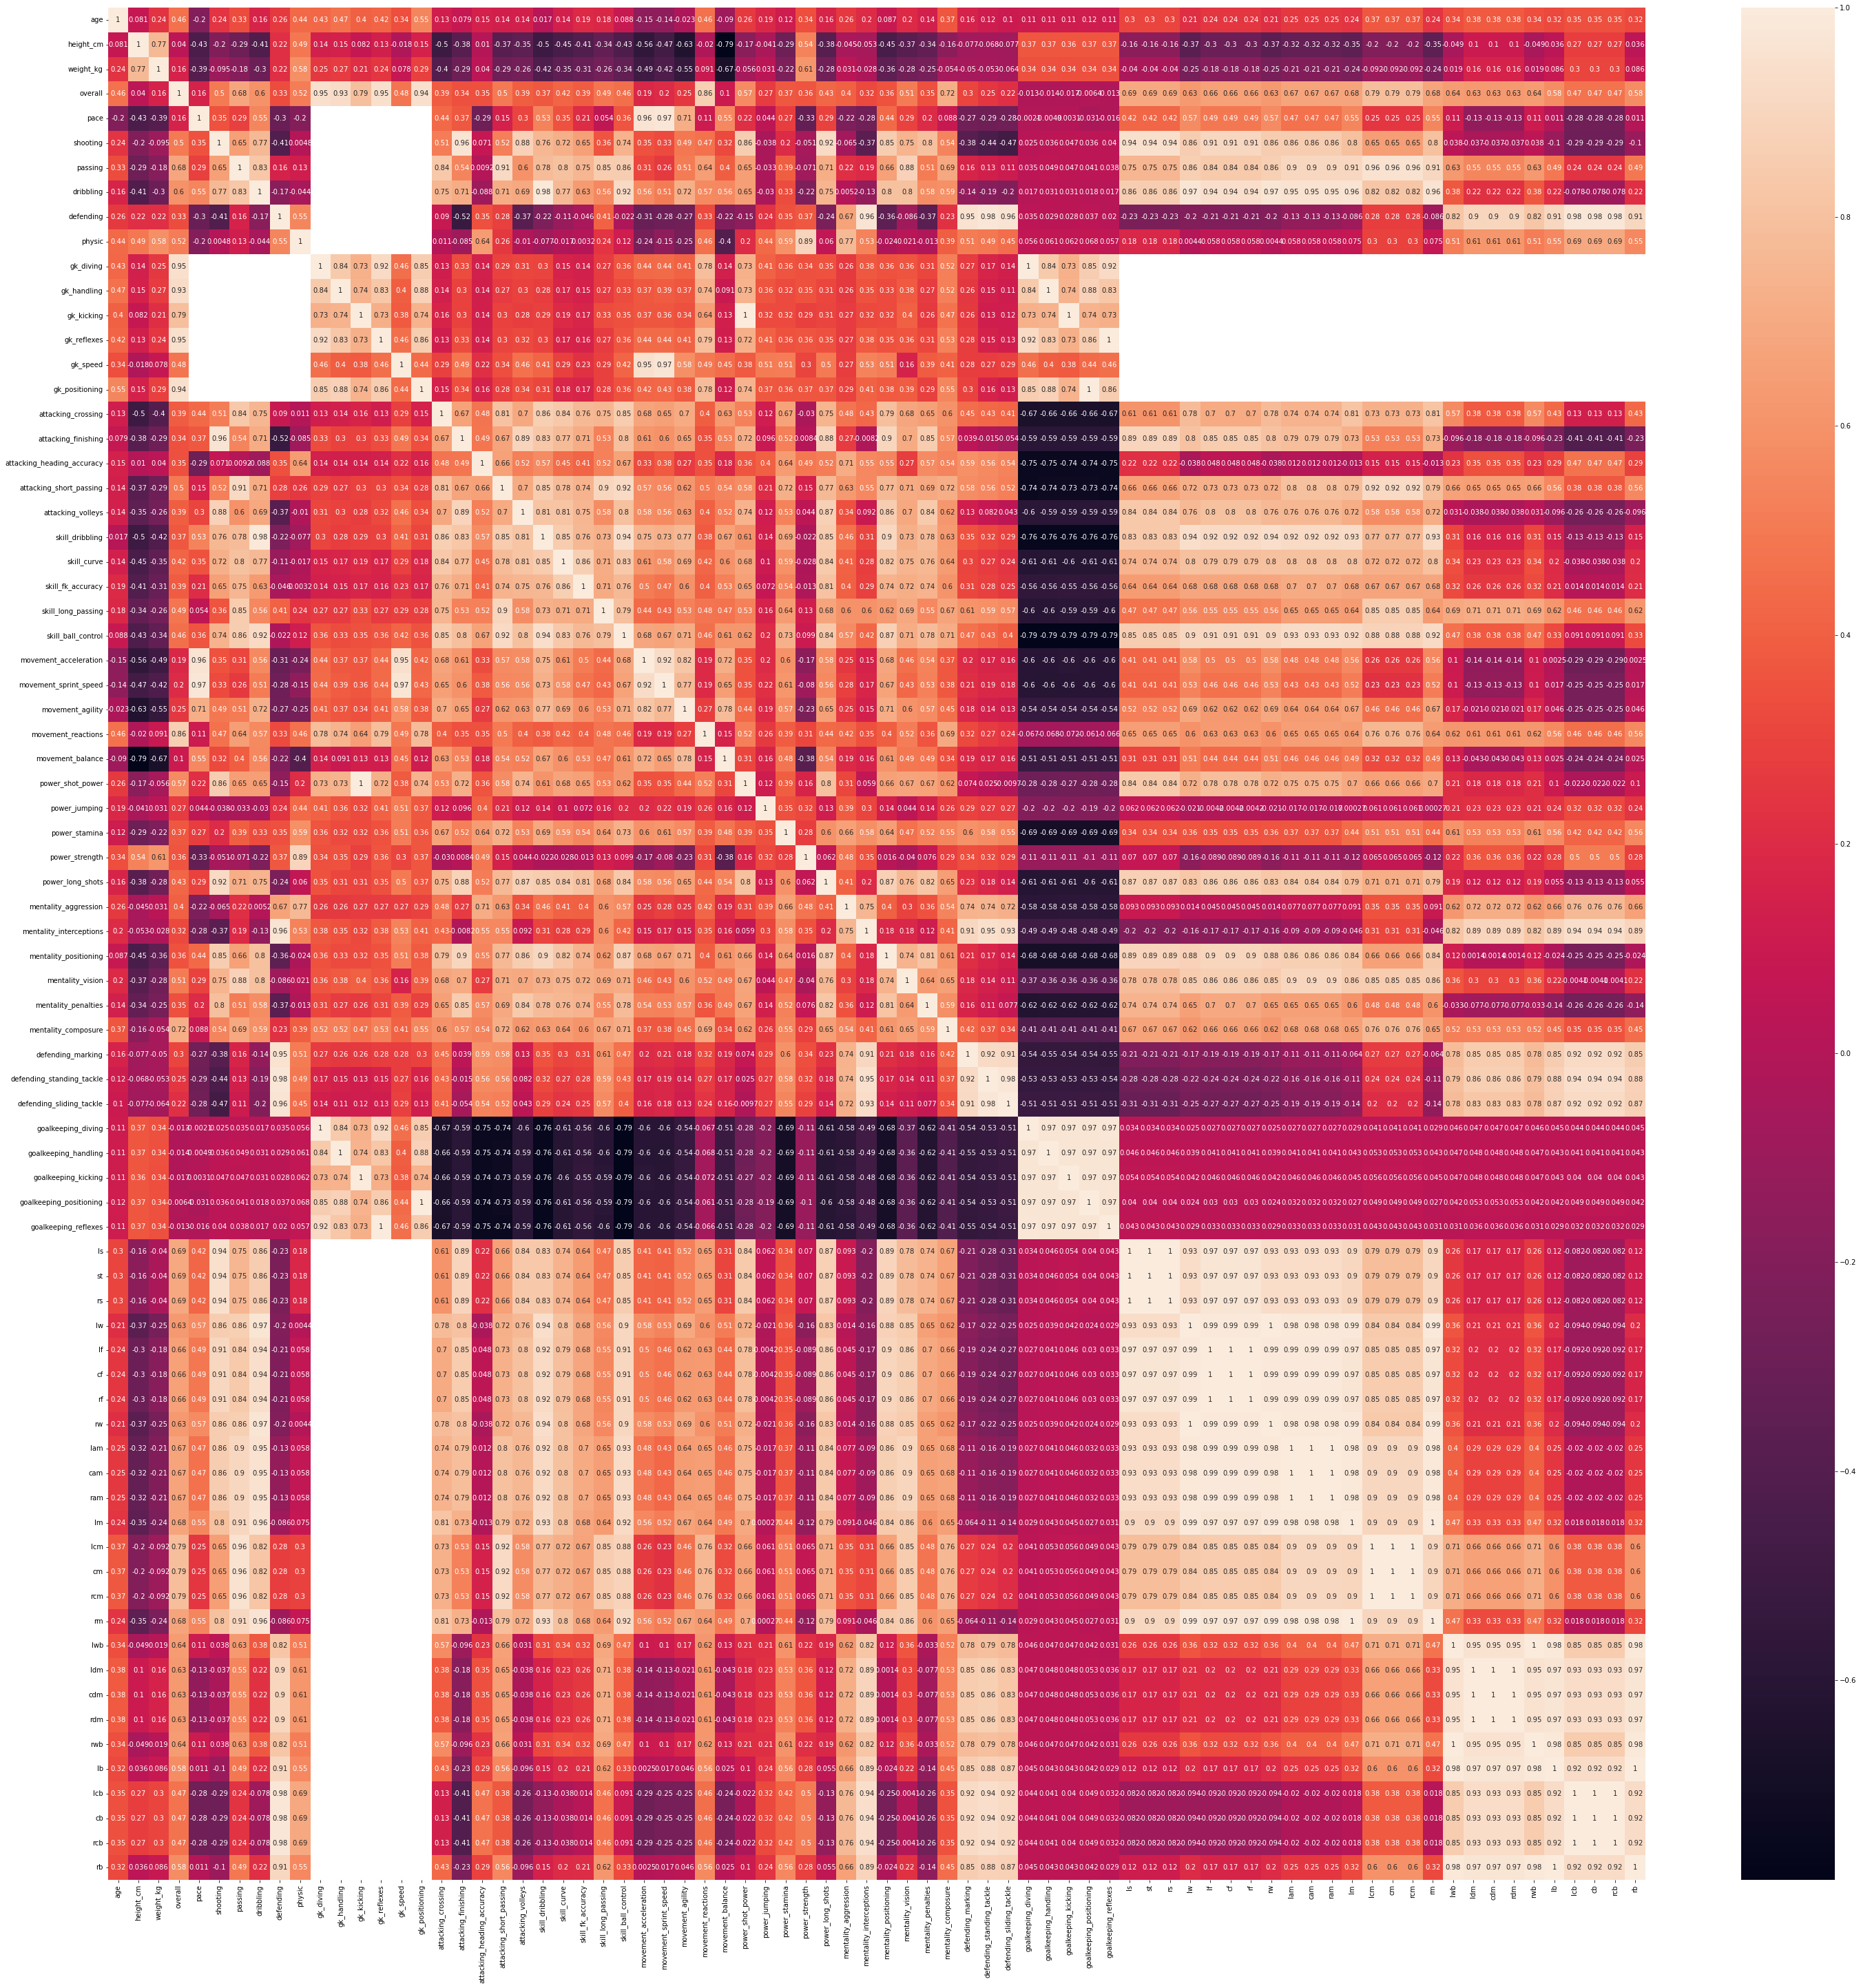

In [22]:
plt.figure(figsize=(50,50))
sns.heatmap(data2.corr(),annot=True)

#### Since [ 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',gk_positioning' ] is highly correlated to [ 'goalkeeping_diving','goalkeeping_handling', 'goalkeeping_kicking','goalkeeping_positioning', 'goalkeeping_reflexes' ]. We remove gk_ variables.

In [23]:
#Removing the highly correlated "gk_" variables. Also removing "gk_speed" variable because it has too many NaN items in it.
data2 = data2.drop(['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes','gk_positioning','gk_speed'], axis=1)

In [24]:
print(data2.shape)
data2.head(10)

(18278, 70)


age  height_cm  weight_kg  overall  pace  shooting  passing  dribbling  \
0   32        170         72       94  87.0      92.0     92.0       96.0   
1   34        187         83       93  90.0      93.0     82.0       89.0   
2   27        175         68       92  91.0      85.0     87.0       95.0   
3   26        188         87       91   NaN       NaN      NaN        NaN   
4   28        175         74       91  91.0      83.0     86.0       94.0   
5   28        181         70       91  76.0      86.0     92.0       86.0   
6   27        187         85       90   NaN       NaN      NaN        NaN   
7   27        193         92       90  77.0      60.0     70.0       71.0   
8   33        172         66       90  74.0      76.0     89.0       89.0   
9   27        175         71       90  93.0      86.0     81.0       89.0   

   defending  physic  attacking_crossing  attacking_finishing  \
0       39.0    66.0                  88                   95   
1       35.0    78.0                  84                   94   
2       32.0    58.0                  87                   87   
3        NaN     NaN                  13                   11   
4       35.0    66.0                  81                   84   
5       61.0    78.0                  93                   82   
6        NaN     NaN                  18                   14   
7       90.0    86.0                  53                   52   
8       72.0    66.0                  86                   72   
9       45.0    74.0                  79                   90   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   
5                          55                       92                 82   
6                          11                       61                 14   
7                          86                       78                 45   
8                          55                       92                 76   
9                          59                       84                 79   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   
5               86           85                 83                  91   
6               21           18                 12                  63   
7               70           60                 70                  81   
8               87           85                 78                  88   
9               89           83                 69                  75   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94                     94                     88   
5                  91                     77                     76   
6                  30                     38                     50   
7                  76                     74                     79   
8                  92                     77                     71   
9                  89                     94                     9

In [25]:
data2.describe()

age     height_cm     weight_kg       overall          pace  \
count  18278.000000  18278.000000  18278.000000  18278.000000  16242.000000   
mean      25.283291    181.362184     75.276343     66.244994     67.700899   
std        4.656964      6.756961      7.047744      6.949953     11.297656   
min       16.000000    156.000000     50.000000     48.000000     24.000000   
25%       22.000000    177.000000     70.000000     62.000000     61.000000   
50%       25.000000    181.000000     75.000000     66.000000     69.000000   
75%       29.000000    186.000000     80.000000     71.000000     75.000000   
max       42.000000    205.000000    110.000000     94.000000     96.000000   

           shooting       passing     dribbling     defending        physic  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean      52.298301     57.233777     62.531585     51.553503     64.876678   
std       14.029418     10.407844     10.284950     16.419528      9.760162   
min       15.000000     24.000000     23.000000     15.000000     27.000000   
25%       42.000000     50.000000     57.000000     36.000000     59.000000   
50%       54.000000     58.000000     64.000000     56.000000     66.000000   
75%       63.000000     64.000000     69.000000     65.000000     72.000000   
max       93.000000     92.000000     96.000000     90.000000     90.000000   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count        18278.000000         18278.000000                18278.000000   
mean            49.718405            45.590218                   52.221468   
std             18.325403            19.594609                   17.428429   
min              5.000000             2.000000                    5.000000   
25%             38.000000            30.000000                   44.000000   
50%             54.000000            49.000000                   56.000000   
75%             64.000000            62.000000                   64.000000   
max             93.000000            95.000000                   93.000000   

       attacking_short_passing  attacking_volleys  skill_dribbling  \
count             18278.000000       18278.000000     18278.000000   
mean                 58.748003          42.809388        55.596509   
std                  14.679653          17.701815        18.929118   
min                   7.000000           3.000000         4.000000   
25%                  54.000000          30.000000        50.000000   
50%                  62.000000          44.000000        61.000000   
75%                  68.000000          56.000000        68.000000   
max                  92.000000          90.000000        97.000000   

        skill_curve  skill_fk_accuracy  skill_long_passing  \
count  18278.000000       18278.000000        18278.000000   
mean      47.325692          42.708885           52.768848   
std       18.422991          17.433612           15.246454   
min        6.000000           4.000000            8.000000   
25%       34.000000          31.000000           43.000000   
50%       49.000000          41.000000           56.000000   
75%       62.000000          56.000000           64.000000   
max       94.000000          94.000000           92.000000   

       skill_ball_control  movement_acceleration  movement_sprint_speed  \
count        18278.000000           18278.000000           18278.000000   
mean            58.461976              64.299923              64.415746   
std             16.741878              15.042232              14.847763   
min              5.000000              12.000000              11.000000   
25%             54.000000              56.000000              57.000000   
50%             63.000000              67.000000              67.000000   
75%             69.000000              75.000000              75.000000   
max             96.000000              97.000000              96.000000   

       movement_agility

# Checking the skewness of the "data2" dataset

### Checking the Skewness of all the features in 'data2' dataframe

In [26]:
# Features in the 'data2' dataframe
data2_features=['age',
       'height_cm', 'weight_kg','overall',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
        'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']

In [29]:
fig, ax = plt.subplots(figsize=(200,250))
data2_skew=data2.skew()
for index, value in data2_skew.iteritems():
    if value >1:
        a=ax.bar(index,value, width = 0.5,color='r',label=' Positively Skewed')
    elif value < -1:
        ax.bar(index,value, width = 0.5,color='b', label=' Negatively Skewed')
    elif value > 0.5 and value < 1:
        ax.bar(index,value, width = 0.5,color='c', label = 'Moderately Positively Skewed')
    elif value < -0.5 and value > -1:
        ax.bar(index,value, width = 0.5,color='m',label='Moderately Negatively Skewed')
    elif value > -0.5 and value < 0.5:
        ax.bar(index,value, width = 0.5,color='g', label='Normally Distributed')   
ax.legend(fontsize=75)
ax.tick_params(axis='x', which='major', labelsize=150,labelrotation=90)
ax.tick_params(axis='y', which='major', labelsize=150)
ax.set_ylabel("Skewness",fontsize=150)

Text(0, 0.5, 'Skewness')

# Normal Probability plot of features
##### The follow plot shows the normal distribution of all the features in 'data2' dataframe.

In [27]:
import scipy.stats as stats
import pylab
plot2_counts = 1
def feature_prob_plot2(data,feature):
    global plot2_counts
    stats.probplot(data[feature],plot=plt.subplot(18,4,plot2_counts))
    plt.ylabel(feature+" Quantiles")
    plot2_counts+=1

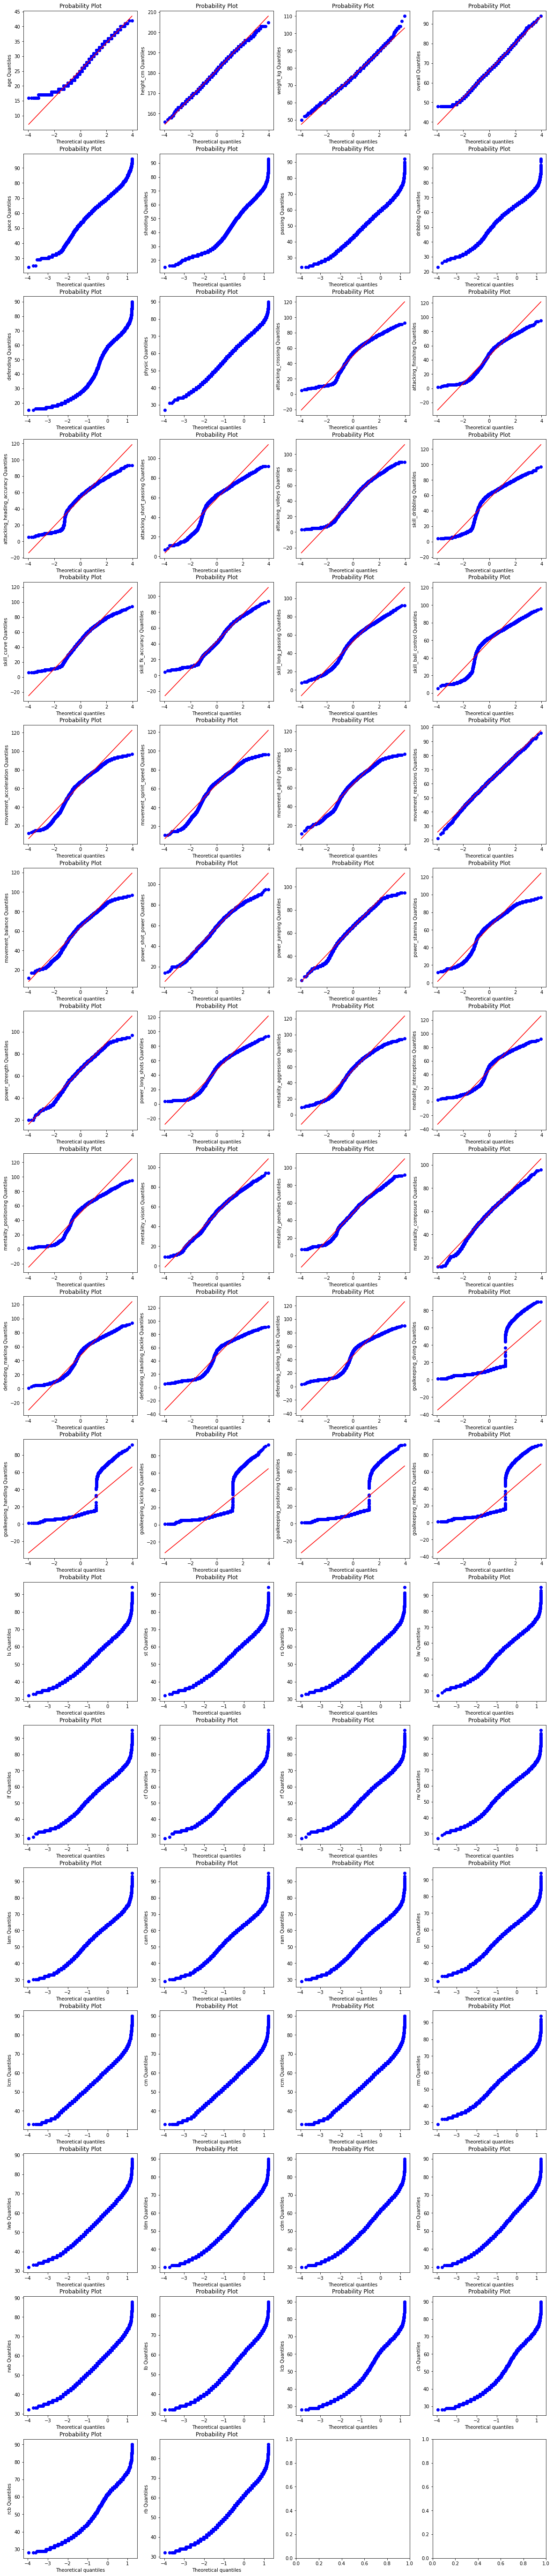

In [28]:
fig, axs = plt.subplots(nrows=18,ncols=4, figsize=(20, 100))
for features in data2_features:
    feature_prob_plot2(data2,features)

### Checking the Null Values in "data2" dataframe

In [30]:
pd.set_option('display.max_rows', 110)
data2.isnull().sum()

age                              0
height_cm                        0
weight_kg                        0
overall                          0
pace                          2036
shooting                      2036
passing                       2036
dribbling                     2036
defending                     2036
physic                        2036
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
movement_agility                 0
movement_reactions               0
movement_balance                 0
power_shot_power                 0
power_jumping                    0
power_stamina                    0
power_strength      

### Creating a new 'data3' dataframe by filling the columns containing the NaN with the minimum value 

In [31]:
data3=data2.fillna(data2.min())
print(data3.shape)
data3.head(10)

(18278, 70)


age  height_cm  weight_kg  overall  pace  shooting  passing  dribbling  \
0   32        170         72       94  87.0      92.0     92.0       96.0   
1   34        187         83       93  90.0      93.0     82.0       89.0   
2   27        175         68       92  91.0      85.0     87.0       95.0   
3   26        188         87       91  24.0      15.0     24.0       23.0   
4   28        175         74       91  91.0      83.0     86.0       94.0   
5   28        181         70       91  76.0      86.0     92.0       86.0   
6   27        187         85       90  24.0      15.0     24.0       23.0   
7   27        193         92       90  77.0      60.0     70.0       71.0   
8   33        172         66       90  74.0      76.0     89.0       89.0   
9   27        175         71       90  93.0      86.0     81.0       89.0   

   defending  physic  attacking_crossing  attacking_finishing  \
0       39.0    66.0                  88                   95   
1       35.0    78.0                  84                   94   
2       32.0    58.0                  87                   87   
3       15.0    27.0                  13                   11   
4       35.0    66.0                  81                   84   
5       61.0    78.0                  93                   82   
6       15.0    27.0                  18                   14   
7       90.0    86.0                  53                   52   
8       72.0    66.0                  86                   72   
9       45.0    74.0                  79                   90   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   
5                          55                       92                 82   
6                          11                       61                 14   
7                          86                       78                 45   
8                          55                       92                 76   
9                          59                       84                 79   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   
5               86           85                 83                  91   
6               21           18                 12                  63   
7               70           60                 70                  81   
8               87           85                 78                  88   
9               89           83                 69                  75   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94                     94                     88   
5                  91                     77                     76   
6                  30                     38                     50   
7                  76                     74                     79   
8                  92                     77                     71   
9                  89                     94                     9

### Checking the correaton of all the features in "data3" based on the R2 score of random Forest Regressor

In [32]:
def corr_features(data, feature, random_state, hc_feat):
    new_data = data.drop(feature, axis = 1)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size = 0.20, random_state = random_state)

    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators=10,random_state=random_state)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    score =  regressor.score(X_test, y_test)
    if score >= 0.98:
        hc_feat.append(feature)
        print("R2 Score for feature {} is {}".format(feature, round(score,3) ))
    else:
        pass
    return hc_feat

In [33]:
hc_feat = []
for key in data3:
    corr_features(data3, key, random_state=10,hc_feat=hc_feat)

R2 Score for feature pace is 1.0
R2 Score for feature shooting is 0.998
R2 Score for feature passing is 0.994
R2 Score for feature dribbling is 0.998
R2 Score for feature defending is 0.998
R2 Score for feature physic is 0.997
R2 Score for feature attacking_finishing is 0.99
R2 Score for feature skill_dribbling is 0.992
R2 Score for feature movement_acceleration is 0.981
R2 Score for feature defending_standing_tackle is 0.983
R2 Score for feature ls is 1.0
R2 Score for feature st is 1.0
R2 Score for feature rs is 1.0
R2 Score for feature lw is 1.0
R2 Score for feature lf is 1.0
R2 Score for feature cf is 1.0
R2 Score for feature rf is 1.0
R2 Score for feature rw is 1.0
R2 Score for feature lam is 1.0
R2 Score for feature cam is 1.0
R2 Score for feature ram is 1.0
R2 Score for feature lm is 1.0
R2 Score for feature lcm is 1.0
R2 Score for feature cm is 1.0
R2 Score for feature rcm is 1.0
R2 Score for feature rm is 1.0
R2 Score for feature lwb is 1.0
R2 Score for feature ldm is 1.0
R2 Sc

In [34]:
# The out of the above "corr_features" function gives the highly correlated features in "data3" dataframe

### Dropping the highly correlated features in "data3" dataframe

In [35]:
data3_cols_drop = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic','attacking_finishing','skill_dribbling','movement_acceleration',
       'defending_standing_tackle','ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb']

In [36]:
# Creating a new dataframe "data4" by dropping the highly correlated features
data4 = data3.drop(data3_cols_drop, axis = 1)

In [37]:
print(data4.shape)
data4.head()

(18278, 34)


age  height_cm  weight_kg  overall  attacking_crossing  \
0   32        170         72       94                  88   
1   34        187         83       93                  84   
2   27        175         68       92                  87   
3   26        188         87       91                  13   
4   28        175         74       91                  81   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0           93                 94                  92                  96   
1           81                 76                  77                  92   
2           88                 87                  81                  95   
3           13                 14                  40                  30   
4           83                 79                  83                  94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   
3                     60                67                  88   
4                     88                95                  90   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   
3                49                59             78             41   
4                94                82             56             84   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   
1              78                93                    63   
2              49                84                    51   
3              78                12                    34   
4              63                80                    54   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   
3                       19                     11                65   
4                       41                     87                89   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   
2                   90                   94                 27   
3                   11                   68                 27   
4                   88                   91                 34   

   defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                        26                   6                    11   
1                        24                   7                    11   
2                        29                   9                     9   
3                        18                  87                    92   
4                        22                  11                    12   

   goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
0                   15                       14                     8  
1                   15                       14                    11  
2                   15                  

### Again checking for highly correlated features in "data4" dataframe

In [38]:
def noncorr_features(data, feature, random_state, hc_feat):
    new_data = data.drop(feature, axis = 1)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size = 0.20, random_state = random_state)

    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators=10,random_state=random_state)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    score =  regressor.score(X_test, y_test)
    if score >= 0.98:
        hc_feat.append(feature)
        print("R2 Score for feature {} is {}".format(feature, round(score,3) ))
    else:
        print("R2 Score for feature {} is not >= 0.98".format(feature))
    return hc_feat

In [39]:
hc_feat = []
for key in data4:
    noncorr_features(data4, key, random_state=10,hc_feat=hc_feat)

R2 Score for feature age is not >= 0.98
R2 Score for feature height_cm is not >= 0.98
R2 Score for feature weight_kg is not >= 0.98
R2 Score for feature overall is not >= 0.98
R2 Score for feature attacking_crossing is not >= 0.98
R2 Score for feature attacking_heading_accuracy is not >= 0.98
R2 Score for feature attacking_short_passing is not >= 0.98
R2 Score for feature attacking_volleys is not >= 0.98
R2 Score for feature skill_curve is not >= 0.98
R2 Score for feature skill_fk_accuracy is not >= 0.98
R2 Score for feature skill_long_passing is not >= 0.98
R2 Score for feature skill_ball_control is not >= 0.98
R2 Score for feature movement_sprint_speed is not >= 0.98
R2 Score for feature movement_agility is not >= 0.98
R2 Score for feature movement_reactions is not >= 0.98
R2 Score for feature movement_balance is not >= 0.98
R2 Score for feature power_shot_power is not >= 0.98
R2 Score for feature power_jumping is not >= 0.98
R2 Score for feature power_stamina is not >= 0.98
R2 Score

#### There are no highly correlated features in "data4" dataframe

### Creating a new data frame "data_with_class". This contains the previously created "players_class" array having details of individual player general position

In [40]:
data_with_class= pd.DataFrame()
data_with_class=data_with_class.append(data4)
data_with_class['players_class']=players_class
data_with_class.head()

age  height_cm  weight_kg  overall  attacking_crossing  \
0   32        170         72       94                  88   
1   34        187         83       93                  84   
2   27        175         68       92                  87   
3   26        188         87       91                  13   
4   28        175         74       91                  81   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0           93                 94                  92                  96   
1           81                 76                  77                  92   
2           88                 87                  81                  95   
3           13                 14                  40                  30   
4           83                 79                  83                  94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                93                  95   
1                     91                87                  96   
2                     89                96                  92   
3                     60                67                  88   
4                     88                95                  90   

   movement_balance  power_shot_power  power_jumping  power_stamina  \
0                95                86             68             75   
1                71                95             95             85   
2                84                80             61             81   
3                49                59             78             41   
4                94                82             56             84   

   power_strength  power_long_shots  mentality_aggression  \
0              68                94                    48   
1              78                93                    63   
2              49                84                    51   
3              78                12                    34   
4              63                80                    54   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     94                94   
1                       29                     95                82   
2                       36                     87                90   
3                       19                     11                65   
4                       41                     87                89   

   mentality_penalties  mentality_composure  defending_marking  \
0                   75                   96                 33   
1                   85                   95                 28   
2                   90                   94                 27   
3                   11                   68                 27   
4                   88                   91                 34   

   defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
0                        26                   6                    11   
1                        24                   7                    11   
2                        29                   9                     9   
3                        18                  87                    92   
4                        22                  11                    12   

   goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                   15                       14                     8   
1                   15                       14                    11   
2                   15               

Text(0, 0.5, 'Value in Euro')

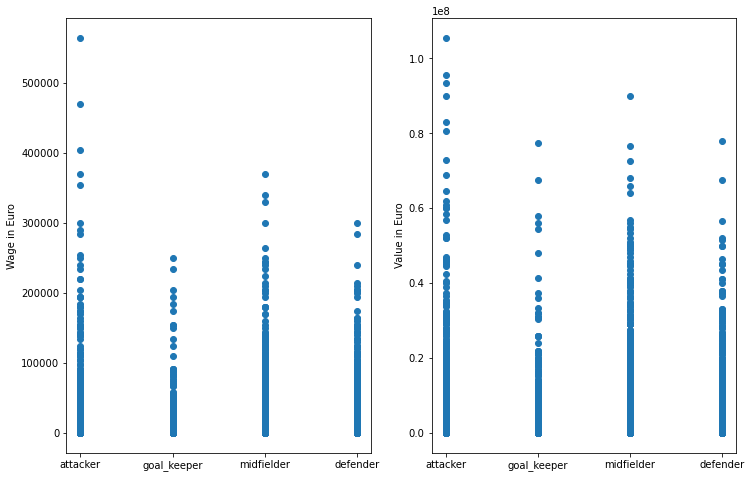

In [41]:
# Players_class vs Wage_euro
fig,ax=plt.subplots(1,2,figsize=(12,8))
ax[0].scatter(data_with_class.players_class,data.wage_eur)
ax[1].scatter(data_with_class.players_class,data.value_eur)
ax[0].set_ylabel('Wage in Euro')
ax[1].set_ylabel('Value in Euro')

# Features in "data4" Data Frame

In [42]:
# features in "data4" dataframe
data4_features = ['age', 'height_cm', 'weight_kg', 'overall', 'attacking_crossing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_curve', 'skill_fk_accuracy',
       'skill_long_passing', 'skill_ball_control', 'movement_sprint_speed','movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_sliding_tackle','goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']
len(data4_features)

34

# Scaling the "data4" dataframe using different Scalers

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
sc=StandardScaler()
mm=MinMaxScaler()
bc = PowerTransformer(method='box-cox')

def scale_data(data,features):
    # Standard Scaler
    data5= sc.fit_transform(data) # Fitting 'data4' datafram
    global data_std_scale
    data_std_scale=pd.DataFrame(data5, columns=features)
    
    # MinMax Scaler
    global data_minmax
    data_minmax = mm.fit_transform(data)
    data_minmax=pd.DataFrame(data_minmax, columns=features)
    
    # Log Scaler
    global data_log
    data_log=np.log(data)

    # Box Cox Standardization
    global data_boxcox
    data_boxcox = bc.fit_transform(data) 
    data_boxcox=pd.DataFrame(data_boxcox, columns=features)

In [44]:
# Calling the function "scale_data"
scale_data(data4,data4.columns)

# Principal Component Analysis (PCA) of the above scaled data

In [45]:
from sklearn.decomposition import PCA
pca_std = PCA()
pca_minmax=PCA()
pca_log = PCA()
pca_boxcox = PCA()

def PCA_scaled(data1, data2, data3, data4):
    
    global X_PCA_std
    X_PCA_std = pd.DataFrame(pca_std.fit_transform(data1))
        
    global X_PCA_minmax
    X_PCA_minmax = pd.DataFrame(pca_minmax.fit_transform(data2))
     
    global X_PCA_log
    X_PCA_log = pd.DataFrame(pca_log.fit_transform(data3))
    
    global X_PCA_boxcox
    X_PCA_boxcox=pd.DataFrame(pca_boxcox.fit_transform(data4))
    
    fig , axs = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
    axs[0,0].bar(np.arange(0,34),pca_std.explained_variance_ratio_)
    axs[0,1].bar(np.arange(0,34),pca_minmax.explained_variance_ratio_)
    axs[1,0].bar(np.arange(0,34),pca_log.explained_variance_ratio_)
    axs[1,1].bar(np.arange(0,34),pca_boxcox.explained_variance_ratio_)
    axs[0,0].set_xlabel('PCA Components',fontsize=15)
    axs[0,0].set_ylabel('Variance Ratio_Std Scaler',fontsize=15)
    axs[0,1].set_xlabel('PCA Components',fontsize=15)
    axs[0,1].set_ylabel('Variance Ratio_Min Max Scaler',fontsize=15)
    axs[1,0].set_xlabel('PCA Components',fontsize=15)
    axs[1,0].set_ylabel('Variance Ratio_Log Scaler',fontsize=15)
    axs[1,1].set_xlabel('PCA Components',fontsize=15)
    axs[1,1].set_ylabel('Variance Ratio_Box Cox Scaler',fontsize=15)

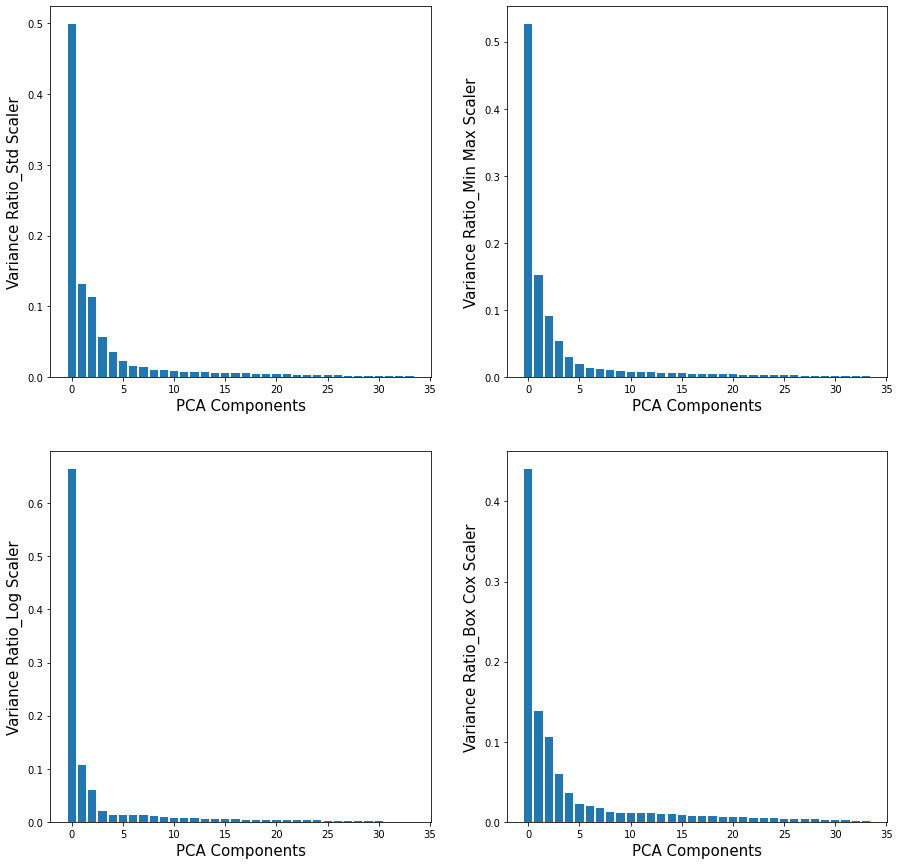

In [46]:
# Calling the "PCA_scaled" function
PCA_scaled(data_std_scale, data_minmax, data_log, data_boxcox)

### Log Scaler has the highest variance ratio in the first two components among other scale methods

# Selecting the Principle Components for K Means Clustering

In [47]:
# Selecting the Principal Components for different scaled data
x_data_std = X_PCA_std.iloc[:,0:2].values
x_data_minmax = X_PCA_minmax.iloc[:,0:2].values
x_data_log = X_PCA_log.iloc[:,0:2].values
x_data_boxcox = X_PCA_boxcox.iloc[:,0:2].values

# Elbow Method to find the no of clusters for K MEANS

Text(0, 0.5, 'WCSS_Box Cox Scaled')

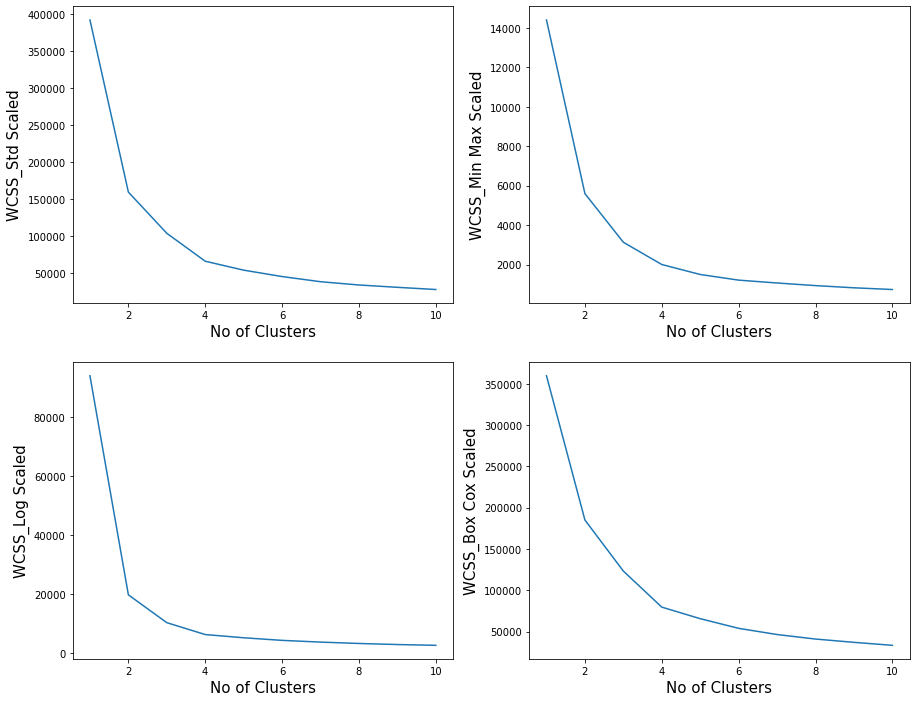

In [48]:
from sklearn.cluster import KMeans
wcss_std = []
wcss_minmax=[]
wcss_log=[]
wcss_boxcox=[]
def kmeans_clus(data,wcss):
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, init='k-means++',max_iter= 300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        
kmeans_clus(x_data_std,wcss_std)
kmeans_clus(x_data_minmax,wcss_minmax)
kmeans_clus(x_data_log,wcss_log)
kmeans_clus(x_data_boxcox,wcss_boxcox)

fig, axs= plt.subplots(nrows=2,ncols=2,figsize=(15,12))
axs[0,0].plot(range(1,11),wcss_std)
axs[0,1].plot(range(1,11),wcss_minmax)
axs[1,0].plot(range(1,11),wcss_log)
axs[1,1].plot(range(1,11),wcss_boxcox)
axs[0,0].set_xlabel('No of Clusters',fontsize=15)
axs[0,0].set_ylabel('WCSS_Std Scaled',fontsize=15)
axs[0,1].set_xlabel('No of Clusters',fontsize=15)
axs[0,1].set_ylabel('WCSS_Min Max Scaled',fontsize=15)
axs[1,0].set_xlabel('No of Clusters',fontsize=15)
axs[1,0].set_ylabel('WCSS_Log Scaled',fontsize=15)
axs[1,1].set_xlabel('No of Clusters',fontsize=15)
axs[1,1].set_ylabel('WCSS_Box Cox Scaled',fontsize=15)

#### The players are intially defined into 4 general playing positions. So we take 4 clusters

# K MEANS FOR 4 CLUSTERS

In [49]:
# k=4
from sklearn.metrics import silhouette_score

kmeans_std = KMeans(n_clusters=4, init='k-means++',max_iter= 300, n_init=10, random_state=0)

kmeans_minmax = KMeans(n_clusters=4, init='k-means++',max_iter= 300, n_init=10, random_state=0)

kmeans_log = KMeans(n_clusters=4, init='k-means++',max_iter= 300, n_init=10, random_state=0)

kmeans_boxcox = KMeans(n_clusters=4, init='k-means++',max_iter= 300, n_init=10, random_state=0)

def kmeans(data1,data2,data3,data4):
    
    global y_predict_std
    y_predict_std = kmeans_std.fit_predict(data1)
    
    global y_predict_minmax
    y_predict_minmax = kmeans_minmax.fit_predict(data2)
    
    global y_predict_log
    y_predict_log = kmeans_log.fit_predict(data3)
    
    global y_predict_boxcox
    y_predict_boxcox = kmeans_boxcox.fit_predict(data4)
    
    sil_score_std = silhouette_score(data1,kmeans_std.labels_)
    sil_score_minmax = silhouette_score(data2,kmeans_minmax.labels_)
    sil_score_log = silhouette_score(data3,kmeans_log.labels_)
    sil_score_boxcox = silhouette_score(data4,kmeans_boxcox.labels_)
    x=['Std_scaler','MinMax_Scaler', "Log_Scaler", 'Box_Scaler']
    y=[sil_score_std, sil_score_minmax, sil_score_log, sil_score_boxcox]
    plt.bar(x,y)
    plt.xlabel("Different Scalers")
    plt.ylabel("Silhouette Score")
    print(y)

[0.42408695541677466, 0.46540964523137396, 0.4998226459881033, 0.41318401499382335]


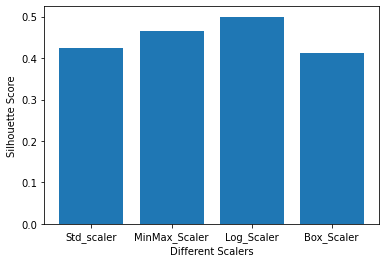

In [50]:
kmeans(x_data_std, x_data_minmax,x_data_log,x_data_boxcox)

#### The Silhouettte Score for the Log Scaled data is higher

# Y-predict of log scaled data

In [51]:
# Class Label 0
out=x_data_log[y_predict_log==0]
print(out)
out.shape

[[-0.53100844  2.11196846]
 [-0.70252519  1.42658058]
 [-0.50890084  1.46030721]
 ...
 [-0.01168817  0.67473802]
 [ 0.39419494  0.61379876]
 [ 0.15424159  0.72993099]]


(4253, 2)

In [52]:
# Class Label 1
out=x_data_log[y_predict_log==1]
print(out)
out.shape

[[ 5.35718656  0.19051468]
 [ 5.26170956 -0.16936969]
 [ 5.19278773 -0.75733202]
 ...
 [ 5.91697672 -0.19091674]
 [ 6.72386863 -0.01730987]
 [ 6.35512701 -0.21100835]]


(2036, 2)

In [53]:
# Class Label 2
out=x_data_log[y_predict_log==2]
print(out)
out.shape

[[-1.87834522 -1.54790279]
 [-1.61513975 -1.64797379]
 [-1.57415475 -1.61741454]
 ...
 [ 0.00588874 -0.99692236]
 [ 0.34286155 -0.19373046]
 [ 0.12789583 -0.11399764]]


(5489, 2)

In [54]:
# K Means Cluster centers of log scaled data
kmeans_log.cluster_centers_

array([[-0.17970681,  1.05603868],
       [ 5.69368961, -0.11218093],
       [-0.57367058, -1.02077757],
       [-1.18216202,  0.2001765 ]])

## Visualizing the cluster formation in the data, scaled with log scaler

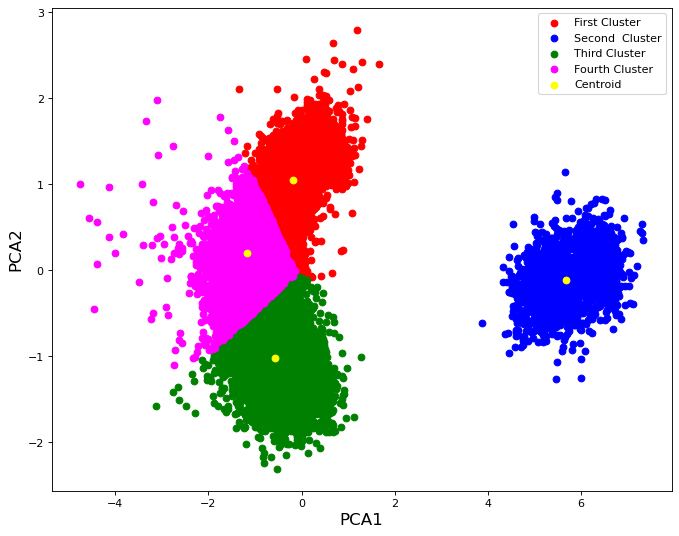

In [55]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.scatter(x_data_log[y_predict_log == 0,0], x_data_log[y_predict_log == 0,1],c='red',label='First Cluster')
plt.scatter(x_data_log[y_predict_log == 1,0], x_data_log[y_predict_log == 1,1],c='blue',label='Second  Cluster')
plt.scatter(x_data_log[y_predict_log == 2,0], x_data_log[y_predict_log == 2,1],c='green',label='Third Cluster')
plt.scatter(x_data_log[y_predict_log == 3,0], x_data_log[y_predict_log == 3,1],c='magenta',label='Fourth Cluster')
plt.scatter(kmeans_log.cluster_centers_[:,0],kmeans_log.cluster_centers_[:,1],c='yellow',label='Centroid')
plt.xlabel('PCA1',fontsize=15)
plt.ylabel('PCA2',fontsize=15)
plt.legend()

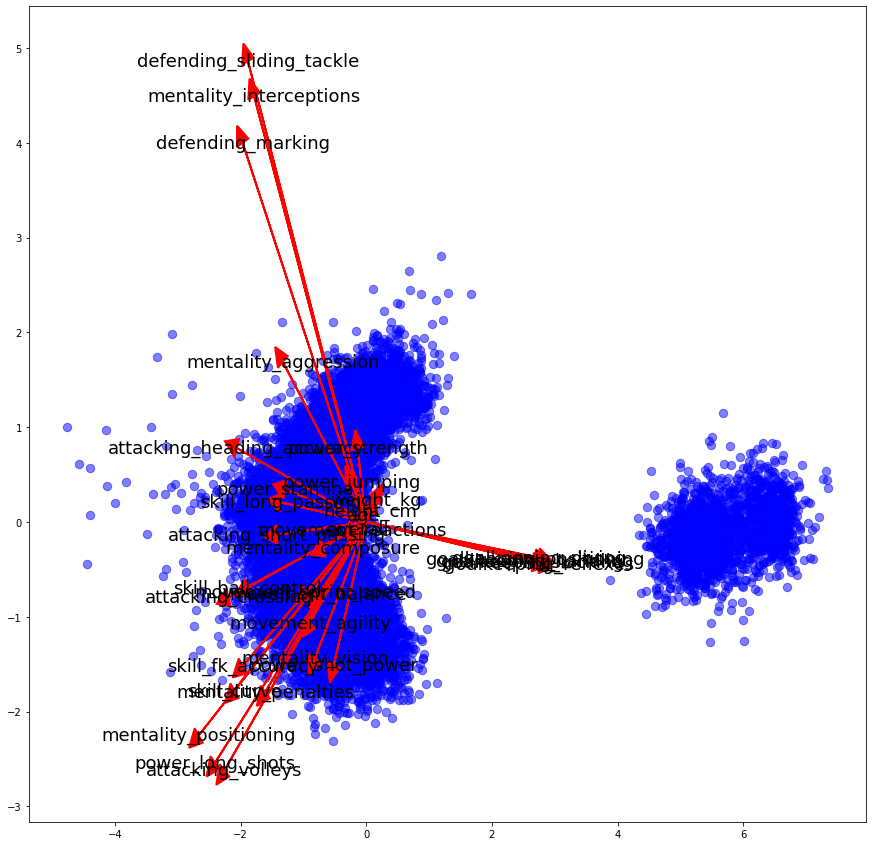

In [56]:
projection_vectors_log=pca_log.components_[0:2].T
arrow_size, text_pos = 10, 10
fig, ax = plt.subplots(figsize = (15,15))
    #scatterplot of the reduced data    
ax.scatter(x=X_PCA_log.iloc[:,0:1], y=X_PCA_log.iloc[:,1:2], facecolors='b', edgecolors='b', s=70, alpha=0.5)
for i , v in enumerate(projection_vectors_log):
    ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
    ax.text(v[0]*text_pos, v[1]*text_pos, data_log.columns[i], color='black', ha='center', va='center', fontsize=18)

In [57]:
sum_sq=0
for i in pca_log.components_[0:1]:
    sum_sq=sum_sq+ (abs(i)**abs(i))
    print(sum_sq)

[0.98023468 0.96544109 0.93928466 0.94589527 0.71692949 0.72203602
 0.75785324 0.71459069 0.72063678 0.72609742 0.76197083 0.72957169
 0.79812751 0.80577243 0.91864886 0.82216042 0.85804406 0.91498948
 0.76776215 0.94149218 0.70973162 0.76473835 0.73514012 0.70290128
 0.81469601 0.74527583 0.83157265 0.72615088 0.73012966 0.70122215
 0.70255063 0.70334121 0.70248248 0.70099575]


# Visualizing the cluster formation in the data, scaled with standard scaler

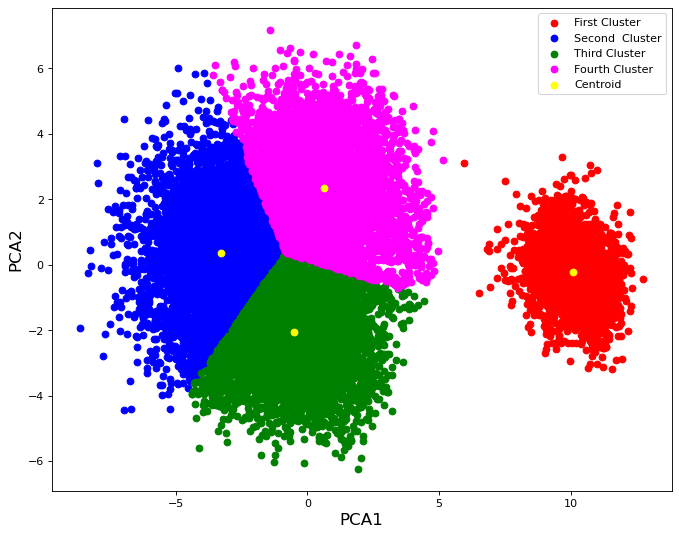

In [58]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.scatter(x_data_std[y_predict_std == 0,0], x_data_std[y_predict_std == 0,1],c='red',label='First Cluster')
plt.scatter(x_data_std[y_predict_std == 1,0], x_data_std[y_predict_std == 1,1],c='blue',label='Second  Cluster')
plt.scatter(x_data_std[y_predict_std == 2,0], x_data_std[y_predict_std == 2,1],c='green',label='Third Cluster')
plt.scatter(x_data_std[y_predict_std == 3,0], x_data_std[y_predict_std == 3,1],c='magenta',label='Fourth Cluster')
plt.scatter(kmeans_std.cluster_centers_[:,0],kmeans_std.cluster_centers_[:,1],c='yellow',label='Centroid')
plt.xlabel('PCA1',fontsize=15)
plt.ylabel('PCA2',fontsize=15)
plt.legend()

# Visualizing the cluster formation in the data, scaled with BOXCOX scaler

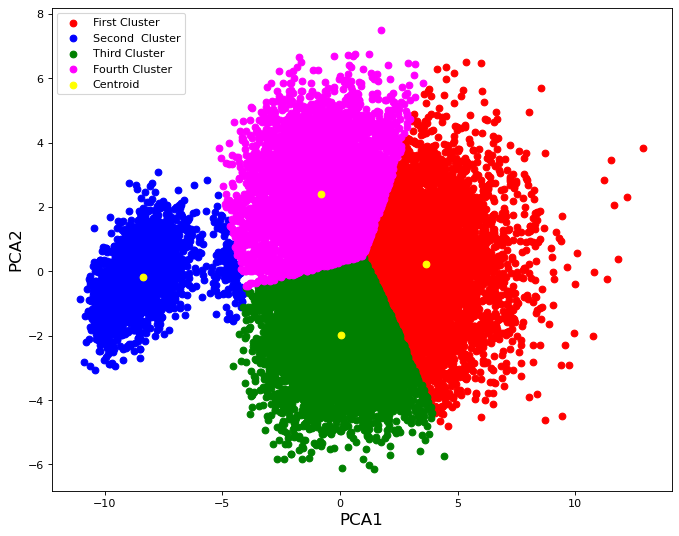

In [59]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.scatter(x_data_boxcox[y_predict_boxcox == 0,0], x_data_boxcox[y_predict_boxcox == 0,1],c='red',label='First Cluster')
plt.scatter(x_data_boxcox[y_predict_boxcox == 1,0], x_data_boxcox[y_predict_boxcox == 1,1],c='blue',label='Second  Cluster')
plt.scatter(x_data_boxcox[y_predict_boxcox == 2,0], x_data_boxcox[y_predict_boxcox == 2,1],c='green',label='Third Cluster')
plt.scatter(x_data_boxcox[y_predict_boxcox == 3,0], x_data_boxcox[y_predict_boxcox == 3,1],c='magenta',label='Fourth Cluster')
plt.scatter(kmeans_boxcox.cluster_centers_[:,0],kmeans_boxcox.cluster_centers_[:,1],c='yellow',label='Centroid')
plt.xlabel('PCA1',fontsize=15)
plt.ylabel('PCA2',fontsize=15)
plt.legend()

# Finding the clusters label and the corresponding player position

## 1) Log Scaled Data

### Initially taking 'n' samples of players from different "players_class"

In [60]:
sample_attackers=data_with_class[data_with_class.players_class=='attacker'].sample(50,random_state=10)
sample_midfielders=data_with_class[data_with_class.players_class=='midfielder'].sample(50,random_state=10)
sample_defenders=data_with_class[data_with_class.players_class=='defender'].sample(50,random_state=10)
sample_goalkeepers=data_with_class[data_with_class.players_class=='goal_keeper'].sample(50,random_state=10)

In [61]:
sample_attackers.head()

age  height_cm  weight_kg  overall  attacking_crossing  \
8708    28        173         69       67                  60   
17375   19        182         67       54                  52   
6832    20        180         82       68                  58   
764     21        173         66       78                  83   
7847    21        180         68       67                  70   

       attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
8708                           70                       71                 54   
17375                          37                       48                 39   
6832                           66                       63                 56   
764                            58                       72                 69   
7847                           54                       68                 37   

       skill_curve  skill_fk_accuracy  skill_long_passing  skill_ball_control  \
8708            43                 37                  63                  67   
17375           44                 42                  43                  53   
6832            58                 44                  54                  64   
764             80                 68                  65                  82   
7847            66                 56                  64                  70   

       movement_sprint_speed  movement_agility  movement_reactions  \
8708                      63                81                  62   
17375                     77                59                  37   
6832                      69                65                  65   
764                       79                84                  71   
7847                      72                77                  61   

       movement_balance  power_shot_power  power_jumping  power_stamina  \
8708                 70                72             83             74   
17375                69                66             39             33   
6832                 70                74             78             75   
764                  82                82             48             67   
7847                 83                62             84             65   

       power_strength  power_long_shots  mentality_aggression  \
8708               67                65                    61   
17375              46                35                    28   
6832               77                72                    67   
764                51                82                    27   
7847               54                62                    53   

       mentality_interceptions  mentality_positioning  mentality_vision  \
8708                        55                     70                67   
17375                       21                     50                50   
6832                        24                     61                55   
764                         29                     73                73   
7847                        42                     60                65   

       mentality_penalties  mentality_composure  defending_marking  \
8708                    46                   50                 39   
17375                   57                   49                 49   
6832                    65                   64                 44   
764                     64                   68                 43   
7847                    48                   65                 57   

       defending_sliding_tackle  goalkeeping_diving  goalkeeping_handling  \
8708                         23                  12                     7   
17375                        27                   8                    12   
6832                         37                  13                    11   
764                          30                   9                    13   
7847                         59                  14                    15   

       goalkeeping_kicking  goalkeeping_posi

## Scaling the sample players data with different scalar

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
def scale_sample_players(attackers,midfielders,defenders,goalkeepers,features):
    # Standard Scaler
    
    # Sample Player Standard Scaling
    global attackers_std_scale
    attackers_std_scale = sc.transform(attackers.iloc[:,0:34]) # Scaling 'sample_attackers' dataframe
    attackers_std_scale = pd.DataFrame(attackers_std_scale, columns=features)
    global midfielders_std_scale
    midfielders_std_scale = sc.transform(midfielders.iloc[:,0:34]) # Scaling 'sample_midfielders' dataframe
    midfielders_std_scale = pd.DataFrame(midfielders_std_scale, columns=features)
    global defenders_std_scale
    defenders_std_scale = sc.transform(defenders.iloc[:,0:34]) # Scaling 'sample_defenders' dataframe
    defenders_std_scale = pd.DataFrame(defenders_std_scale, columns=features)
    global goalkeepers_std_scale
    goalkeepers_std_scale = sc.transform(goalkeepers.iloc[:,0:34]) # Scaling 'sample_goalkeepers' dataframe
    goalkeepers_std_scale = pd.DataFrame(goalkeepers_std_scale, columns=features)
    
    # MinMax Scaler
    
    # Log Scaler
    global attackers_log_scale
    attackers_log_scale = np.log(attackers.iloc[:,0:34]) # Scaling 'sample_attackers' dataframe
    global midfielders_log_scale
    midfielders_log_scale = np.log(midfielders.iloc[:,0:34]) # Scaling 'sample_midfielders' dataframe
    global defenders_log_scale
    defenders_log_scale = np.log(defenders.iloc[:,0:34]) # Scaling 'sample_defenders' dataframe
    global goalkeepers_log_scale
    goalkeepers_log_scale = np.log(goalkeepers.iloc[:,0:34]) # Scaling 'sample_goalkeepers' dataframe

    # Box Cox Standardization
    
    # Sample Players BOXCOX Scaling
    global attackers_boxcox_scale
    attackers_boxcox_scale = bc.transform(attackers.iloc[:,0:34]) # Scaling 'sample_attackers' dataframe
    attackers_boxcox_scale = pd.DataFrame(attackers_boxcox_scale, columns=features)
    global midfielders_boxcox_scale
    midfielders_boxcox_scale = bc.transform(midfielders.iloc[:,0:34]) # Scaling 'sample_midfielders' dataframe
    midfielders_boxcox_scale = pd.DataFrame(midfielders_boxcox_scale, columns=features)
    global defenders_boxcox_scale
    defenders_boxcox_scale = bc.transform(defenders.iloc[:,0:34]) # Scaling 'sample_defenders' dataframe
    defenders_boxcox_scale = pd.DataFrame(defenders_boxcox_scale, columns=features)
    global goalkeepers_boxcox_scale
    goalkeepers_boxcox_scale = bc.transform(goalkeepers.iloc[:,0:34]) # Scaling 'sample_goalkeepers' dataframe
    goalkeepers_boxcox_scale = pd.DataFrame(goalkeepers_boxcox_scale, columns=features)
    

In [63]:
#calling the above function
scale_sample_players(sample_attackers,sample_midfielders,sample_defenders,sample_goalkeepers,data_with_class.columns[0:34])

## Defining PCA for the scaled sample players

In [64]:
def PCA_std_samples(attackers,midfielders,defenders,goalkeepers):
    
    #PCA of samples scaled with standard scalar
    global attackers_PCA_std
    attackers_PCA_std = pd.DataFrame(pca_std.transform(attackers))
    global midfielders_PCA_std
    midfielders_PCA_std = pd.DataFrame(pca_std.transform(midfielders))
    global defenders_PCA_std
    defenders_PCA_std = pd.DataFrame(pca_std.transform(defenders))
    global goalkeepers_PCA_std
    goalkeepers_PCA_std = pd.DataFrame(pca_std.transform(goalkeepers))

def PCA_log_samples(attackers,midfielders,defenders,goalkeepers):

    # PCA of samples scaled with log scaled    
    global attackers_PCA_log
    attackers_PCA_log = pd.DataFrame(pca_log.transform(attackers))
    global midfielders_PCA_log
    midfielders_PCA_log = pd.DataFrame(pca_log.transform(midfielders))
    global defenders_PCA_log
    defenders_PCA_log = pd.DataFrame(pca_log.transform(defenders))
    global goalkeepers_PCA_log
    goalkeepers_PCA_log = pd.DataFrame(pca_log.transform(goalkeepers))

def PCA_boxcox_samples(attackers,midfielders,defenders,goalkeepers):
    
    global attackers_PCA_boxcox
    attackers_PCA_boxcox=pd.DataFrame(pca_boxcox.transform(attackers))
    global midfielders_PCA_boxcox
    midfielders_PCA_boxcox = pd.DataFrame(pca_boxcox.transform(midfielders))
    global defenders_PCA_boxcox
    defenders_PCA_boxcox = pd.DataFrame(pca_boxcox.transform(defenders))
    global goalkeepers_PCA_boxcox
    goalkeepers_PCA_boxcox = pd.DataFrame(pca_boxcox.transform(goalkeepers))

## Doing PCA of the log scaled sample players

In [65]:
# Calling the above function to perform PCA of log scaled sample players data
PCA_log_samples(attackers_log_scale,midfielders_log_scale,defenders_log_scale,goalkeepers_log_scale)

## K Means of the log scaled sample players after PCA

### Selecting the required PCA components to perform K Means

In [66]:
x_attackers_log = attackers_PCA_log.iloc[:,0:2].values
x_midfielders_log = midfielders_PCA_log.iloc[:,0:2].values
x_defenders_log = defenders_PCA_log.iloc[:,0:2].values
x_goalkeepers_log = goalkeepers_PCA_log.iloc[:,0:2].values

### Defining a funtion for K Means

In [67]:
def kmeans_samples(x_attackers,x_midfielders,x_defenders,x_goalkeepers):
    
    global y_attackers_log
    y_attackers_log = kmeans_log.predict(x_attackers)
    
    global y_midfielders_log
    y_midfielders_log = kmeans_log.predict(x_midfielders)
    
    global y_defenders_log
    y_defenders_log = kmeans_log.predict(x_defenders)
    
    global y_goalkeepers_log
    y_goalkeepers_log = kmeans_log.predict(x_goalkeepers)

### Doing K Means for the log scaled sample players by calling the above function

In [68]:
kmeans_samples(x_attackers_log,x_midfielders_log,x_defenders_log,x_goalkeepers_log)

### Output of the K Means of log scaled sample players data 

In [69]:
y_attackers_log

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2])

In [70]:
y_midfielders_log

array([3, 3, 3, 3, 3, 2, 2, 3, 2, 0, 0, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       0, 3, 0, 0, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3,
       3, 3, 0, 2, 3, 2])

In [71]:
y_defenders_log

array([0, 3, 3, 3, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 0, 0,
       3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0,
       0, 3, 0, 0, 0, 0])

In [72]:
y_goalkeepers_log

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

#### Different labels for the "players_positions" from log scaled sample players output
#### defenders --->0, goalkeepers-->1, attackers-->2, midfielders-->3

## Visualization of all clusters formed in log-scaled data and log-scaled sample players position in the cluster

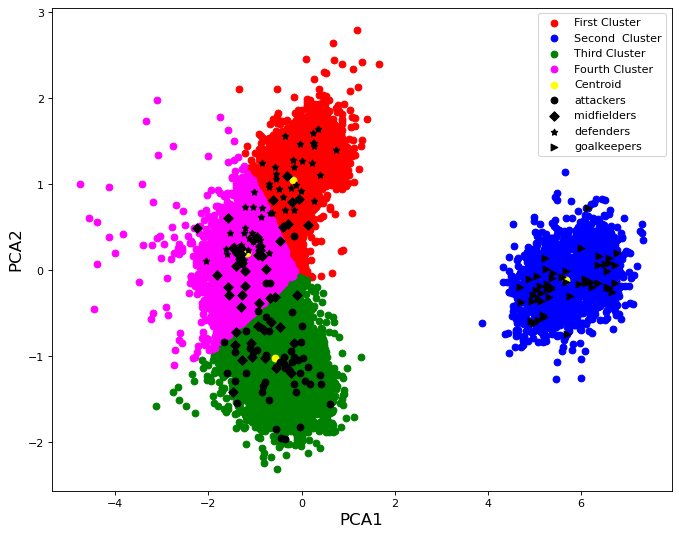

In [73]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.scatter(x_data_log[y_predict_log == 0,0], x_data_log[y_predict_log == 0,1],c='red',label='First Cluster')
plt.scatter(x_data_log[y_predict_log == 1,0], x_data_log[y_predict_log == 1,1],c='blue',label='Second  Cluster')
plt.scatter(x_data_log[y_predict_log == 2,0], x_data_log[y_predict_log == 2,1],c='green',label='Third Cluster')
plt.scatter(x_data_log[y_predict_log == 3,0], x_data_log[y_predict_log == 3,1],c='magenta',label='Fourth Cluster')
plt.scatter(kmeans_log.cluster_centers_[:,0],kmeans_log.cluster_centers_[:,1],c='yellow',label='Centroid')
plt.scatter(x_attackers_log.T[0], x_attackers_log.T[1],c='black',label='attackers', marker="o")
plt.scatter(x_midfielders_log.T[0], x_midfielders_log.T[1],c='black',label='midfielders', marker='D')
plt.scatter(x_defenders_log.T[0], x_defenders_log.T[1],c='black',label='defenders', marker=(5, 1))
plt.scatter(x_goalkeepers_log.T[0], x_goalkeepers_log.T[1],c='black',label='goalkeepers', marker='>')

plt.xlabel('PCA1',fontsize=15)
plt.ylabel('PCA2',fontsize=15)
plt.legend()

### From the above graph graph, Red Color - Defenders, Magenta - Midfielders, Green - Attackers, Blue - Goal Keepers 

# 2) Standard scaler scaled data

## PCA for sample players scaled by standard scaler

In [74]:
PCA_std_samples(attackers_std_scale,midfielders_std_scale,defenders_std_scale,goalkeepers_std_scale)

In [75]:
x_attackers_std = attackers_PCA_std.iloc[:,0:2].values
x_midfielders_std = midfielders_PCA_std.iloc[:,0:2].values
x_defenders_std = defenders_PCA_std.iloc[:,0:2].values
x_goalkeepers_std = goalkeepers_PCA_std.iloc[:,0:2].values

## Visualizing the cluster labels in the standard scaled cluster using sample players data

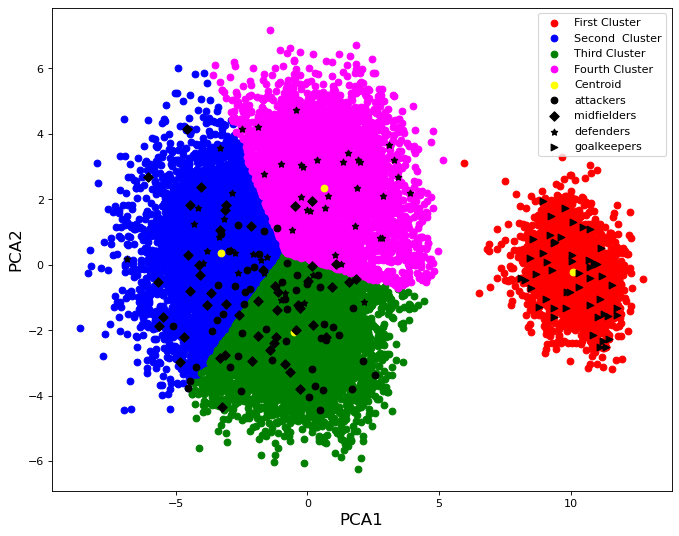

In [76]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.scatter(x_data_std[y_predict_std == 0,0], x_data_std[y_predict_std == 0,1],c='red',label='First Cluster')
plt.scatter(x_data_std[y_predict_std == 1,0], x_data_std[y_predict_std == 1,1],c='blue',label='Second  Cluster')
plt.scatter(x_data_std[y_predict_std == 2,0], x_data_std[y_predict_std == 2,1],c='green',label='Third Cluster')
plt.scatter(x_data_std[y_predict_std== 3,0], x_data_std[y_predict_std == 3,1],c='magenta',label='Fourth Cluster')
plt.scatter(kmeans_std.cluster_centers_[:,0],kmeans_std.cluster_centers_[:,1],c='yellow',label='Centroid')
plt.scatter(x_attackers_std.T[0], x_attackers_std.T[1],c='black',label='attackers', marker="o")
plt.scatter(x_midfielders_std.T[0], x_midfielders_std.T[1],c='black',label='midfielders', marker='D')
plt.scatter(x_defenders_std.T[0], x_defenders_std.T[1],c='black',label='defenders', marker=(5, 1))
plt.scatter(x_goalkeepers_std.T[0], x_goalkeepers_std.T[1],c='black',label='goalkeepers', marker='>')
plt.xlabel('PCA1',fontsize=15)
plt.ylabel('PCA2',fontsize=15)
plt.legend()

# 3) BoxCox scaler scaled data

## PCA for player samples scaled by boxcox scaler

In [77]:
PCA_boxcox_samples(attackers_boxcox_scale,midfielders_boxcox_scale,defenders_boxcox_scale,goalkeepers_boxcox_scale)

In [78]:
x_attackers_boxcox = attackers_PCA_boxcox.iloc[:,0:2].values
x_midfielders_boxcox = midfielders_PCA_boxcox.iloc[:,0:2].values
x_defenders_boxcox = defenders_PCA_boxcox.iloc[:,0:2].values
x_goalkeepers_boxcox = goalkeepers_PCA_boxcox.iloc[:,0:2].values

## Visualizing the cluster labels in the boxcox scaled cluster using sample players data

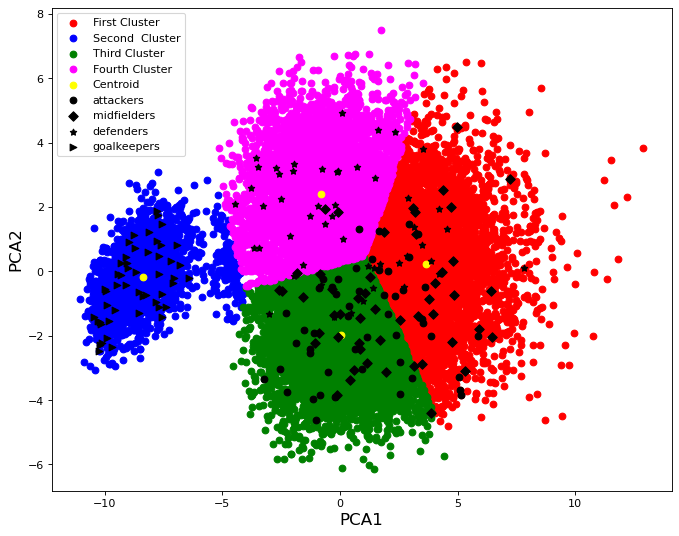

In [79]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.scatter(x_data_boxcox[y_predict_boxcox == 0,0], x_data_boxcox[y_predict_boxcox == 0,1],c='red',label='First Cluster')
plt.scatter(x_data_boxcox[y_predict_boxcox == 1,0], x_data_boxcox[y_predict_boxcox == 1,1],c='blue',label='Second  Cluster')
plt.scatter(x_data_boxcox[y_predict_boxcox == 2,0], x_data_boxcox[y_predict_boxcox == 2,1],c='green',label='Third Cluster')
plt.scatter(x_data_boxcox[y_predict_boxcox == 3,0], x_data_boxcox[y_predict_boxcox == 3,1],c='magenta',label='Fourth Cluster')
plt.scatter(kmeans_boxcox.cluster_centers_[:,0],kmeans_boxcox.cluster_centers_[:,1],c='yellow',label='Centroid')
plt.scatter(x_attackers_boxcox.T[0], x_attackers_boxcox.T[1],c='black',label='attackers', marker="o")
plt.scatter(x_midfielders_boxcox.T[0], x_midfielders_boxcox.T[1],c='black',label='midfielders', marker='D')
plt.scatter(x_defenders_boxcox.T[0], x_defenders_boxcox.T[1],c='black',label='defenders', marker=(5, 1))
plt.scatter(x_goalkeepers_boxcox.T[0], x_goalkeepers_boxcox.T[1],c='black',label='goalkeepers', marker='>')
plt.xlabel('PCA1',fontsize=15)
plt.ylabel('PCA2',fontsize=15)
plt.legend()

# Final Result

#### The clustering of players is efficient with log scaling. This final clustering is below.

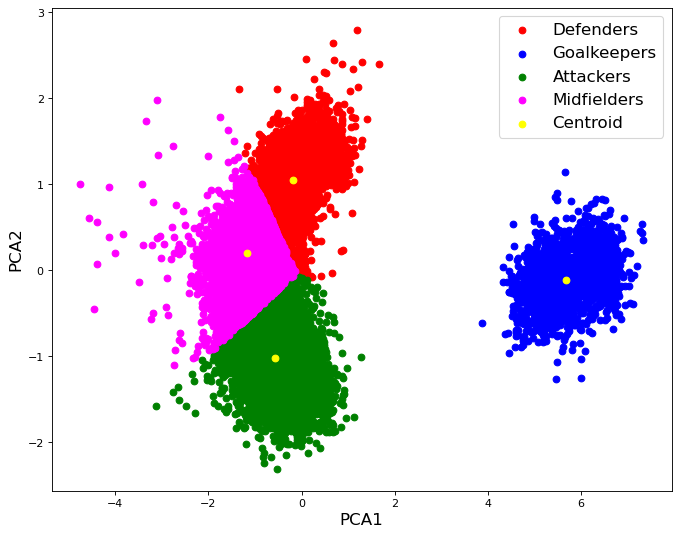

In [80]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.scatter(x_data_log[y_predict_log == 0,0], x_data_log[y_predict_log == 0,1],c='red',label='Defenders')
plt.scatter(x_data_log[y_predict_log == 1,0], x_data_log[y_predict_log == 1,1],c='blue',label='Goalkeepers')
plt.scatter(x_data_log[y_predict_log == 2,0], x_data_log[y_predict_log == 2,1],c='green',label='Attackers')
plt.scatter(x_data_log[y_predict_log == 3,0], x_data_log[y_predict_log == 3,1],c='magenta',label='Midfielders')
plt.scatter(kmeans_log.cluster_centers_[:,0],kmeans_log.cluster_centers_[:,1],c='yellow',label='Centroid')
plt.xlabel('PCA1',fontsize=15)
plt.ylabel('PCA2',fontsize=15)
plt.legend(fontsize=15)